#**BUMBLE PROFILES ANALYSIS: User Demographics, Preferences, And Trends**

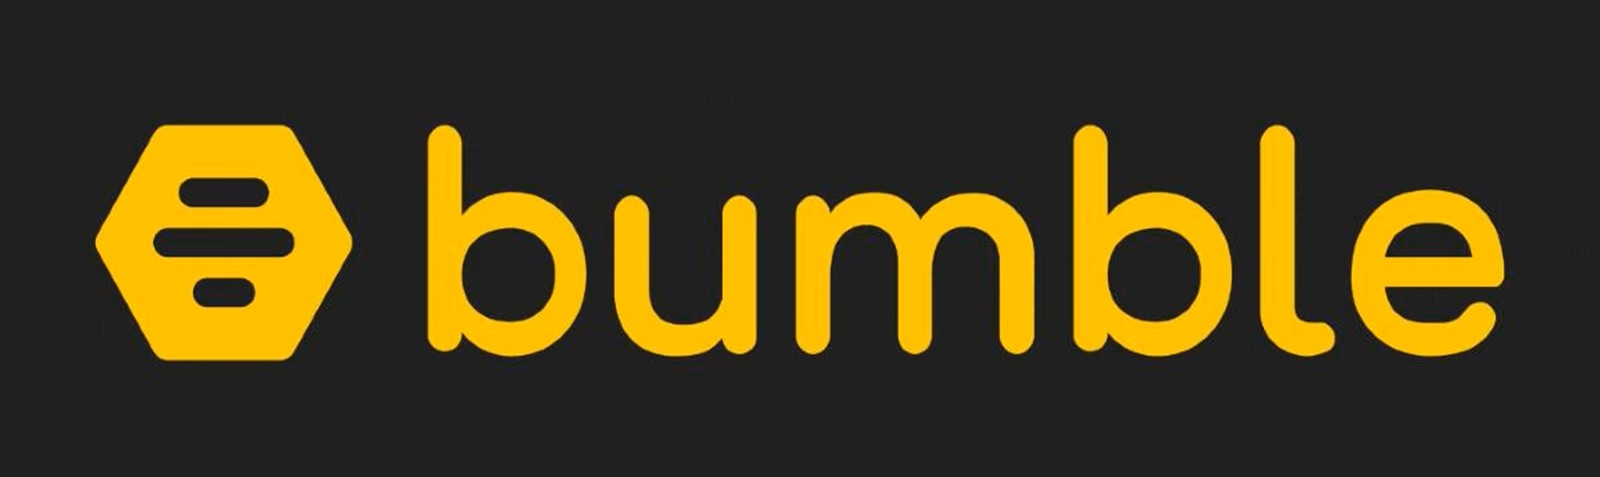

#**1. PROBLEM STATEMENT**

##**Background**

Bumble is a dating app where people connect based on shared interests and compatibility. The platform collects user information, such as age, height, lifestyle choices, and location, through profiles. This data can help Bumble improve matchmaking, user engagement, and personalised features.

##**Analyst Role**

As a data analyst at Bumble, Our job is to examine user profile data to find patterns in demographics, preferences, and behaviour. Our insights will help the product and marketing teams make informed decisions to improve the user experience and grow the platform.

##**Goals and Objectives**

1. **Understand user demographics, preferences, and behaviours** to optimize matchmaking algorithms.
2. **Identify key lifestyle and financial factors** influencing user engagement.
3. **Analyse location and language trends** to improve targeted marketing efforts.
4. **Provide data-driven recommendations** to enhance the platform’s features and user satisfaction.

#**DATASET OVERVIEW**

##**2.1 Dataset Summary**

####**Dataset Source:** Provided as part of the Data Analyst course Graduation Project by NextLeap

####**Dataset Name:** Bumble User Profiles

####**Number of Rows:** 59,946

####**Number of Columns:** 17

####**Categorical Columns:** 14 [status, gender, body_type, diet, drinks, education, ethnicity, job, location, pets, religion, sign, speaks]

####**Numerical Columns:** 3 [age, height, income]

####**Datetime Column:** 1 [last_online]

####**Description:** This dataset contains user profiles from Bumble, covering demographics, lifestyle preferences, and activity data. The goal is to analyse user behaviour, identify trends, and provide insights to improve matchmaking and user engagement.

##**2.2 Segregation of Columns**

###**1. Demographics**

**age:** Age of the user.

**status:** Relationship status (e.g., single, married, seeing someone).

**gender:** Gender of the user (e.g., m, f).

###**2. Physical Attributes**

**body_type:** Descriptions of physical appearance (e.g., athletic, curvy, thin).

**height:** Height of the user (in inches).

###**3. Lifestyle Preferences**

**diet:** Dietary preferences (e.g., vegetarian, vegan, anything).

**drinks:** Drinking habits (e.g., socially, often).

###**4. Educational and Financial Details**

**education:** Education level (e.g., college, masters).

**income:** User-reported annual income.

###**5. Location and Activity**

**location:** City and state where the user resides.

**last_online:** Date and time when the user was last active.

#**3. IMPORTING, LOADING & PRELIMINARY EXPLORATION**

##**3.1 Importing Required Libraries**

In [ ]:
import pandas as pd                  #  For data manipulation and analysis
import numpy as np                   #  For numerical computations
import matplotlib.pyplot as plt      #  For plotting and visualization
import seaborn as sns                #  For advanced visualizations

##**3.2 Loading Dataset From Drive**

In [ ]:
# Step 1: Install gdown if not already installed
!pip install gdown

# Step 2: Import necessary libraries
import gdown
import pandas as pd

# Step 3: Define the file ID and create the download URL
file_id = "1VfpEuAwMv2VPuTbHPeRKnLi4jnCMUbvf"  # Replace with your file ID
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
bumble_file = "downloaded_dataset.csv"

# Step 5: Download the file
gdown.download(download_url, bumble_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame
data = pd.read_csv(bumble_file)

Downloading...
From: https://drive.google.com/uc?id=1VfpEuAwMv2VPuTbHPeRKnLi4jnCMUbvf
To: /content/downloaded_dataset.csv
100%|██████████| 13.7M/13.7M [00:00<00:00, 55.3MB/s]


##**3.3 Checking Shape Of Dataset**

In [ ]:
rows, columns = data.shape
print(f"The dataset contains {rows} row and {columns} columns.")

The dataset contains 59946 row and 17 columns.


##**3.4 Viewing All Column In Dataset**

In [ ]:
# Viewing all column names as not all are visible in head or sample above
data.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks'],
      dtype='object')

##**3.5 Displaying Random Few Rows**

In [ ]:
# Randomly selecting 5 rows from the dataset
data.sample(10)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
27600,38,single,m,skinny,NaN,socially,working on college/university,white,73.0,-1,entertainment / media,2012-03-01-16-48,"san francisco, california",NaN,buddhism and laughing about it,taurus and it&rsquo;s fun to think about,"english (fluently), chinese (poorly), spanish ..."
47838,41,single,m,average,mostly anything,socially,graduated from college/university,white,69.0,-1,science / tech / engineering,2012-06-30-10-24,"san francisco, california",has dogs,judaism and laughing about it,gemini but it doesn&rsquo;t matter,english
6443,32,single,f,thin,strictly anything,socially,graduated from law school,white,70.0,-1,law / legal services,2012-06-29-14-21,"san francisco, california",NaN,NaN,NaN,english
3135,40,single,m,average,NaN,not at all,graduated from two-year college,hispanic / latin,69.0,20000,student,2012-06-28-21-27,"oakland, california",NaN,christianity,NaN,"english, spanish (fluently)"
1162,37,single,f,thin,mostly anything,socially,dropped out of space camp,native american,68.0,-1,law / legal services,2011-06-27-16-17,"oakland, california",NaN,other,gemini and it&rsquo;s fun to think about,english (fluently)
27638,27,single,m,athletic,mostly anything,often,graduated from college/university,white,69.0,-1,other,2012-06-30-14-29,"san francisco, california",has dogs and dislikes cats,catholicism but not too serious about it,aquarius but it doesn&rsquo;t matter,"english (fluently), spanish (poorly)"
32527,32,single,m,average,NaN,socially,NaN,asian,66.0,-1,executive / management,2012-06-26-00-22,"palo alto, california",likes dogs,NaN,NaN,"english (fluently), chinese (okay)"
58853,29,single,m,fit,NaN,socially,graduated from ph.d program,white,71.0,-1,education / academia,2012-07-01-08-32,"san francisco, california",NaN,judaism,pisces,"english, spanish (fluently), hebrew (poorly)"
35290,52,single,m,athletic,strictly anything,often,graduated from college/university,white,72.0,-1,other,2012-06-29-23-20,"mill valley, california",has dogs,other,libra but it doesn&rsquo;t matter,english
7503,37,single,m,average,mostly anything,socially,NaN,asian,67.0,-1,clerical / administrative,2012-06-30-02-19,"san francisco, california",likes dogs and likes cats,NaN,capricorn and it&rsquo;s fun to think about,english


##**3.6 Displaying Dataset Information**

In [ ]:
print("Dataset Information:\n")
data.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


##**3.7 Missing Values Data Summary**

In [ ]:
# Calculating the missing value for each column
missing_values = data.isnull().sum()

# calculating the missing percentage
missing_percentage = (missing_values / len(data)) * 100

# creating summary table
missing_summary = pd.DataFrame({"missing values in each column": missing_values,
                                "missing %": missing_percentage }).sort_values(by ="missing %",ascending=False)

# Displaying summary table
print("missing data summary for each column:\n\n", missing_summary)

missing data summary for each column:

              missing values in each column  missing %
diet                                 24395  40.694959
religion                             20226  33.740366
pets                                 19921  33.231575
sign                                 11056  18.443266
job                                   8198  13.675641
education                             6628  11.056618
ethnicity                             5680   9.475194
body_type                             5296   8.834618
drinks                                2985   4.979482
speaks                                  50   0.083408
height                                   3   0.005005
last_online                              0   0.000000
location                                 0   0.000000
income                                   0   0.000000
status                                   0   0.000000
gender                                   0   0.000000
age                                      0

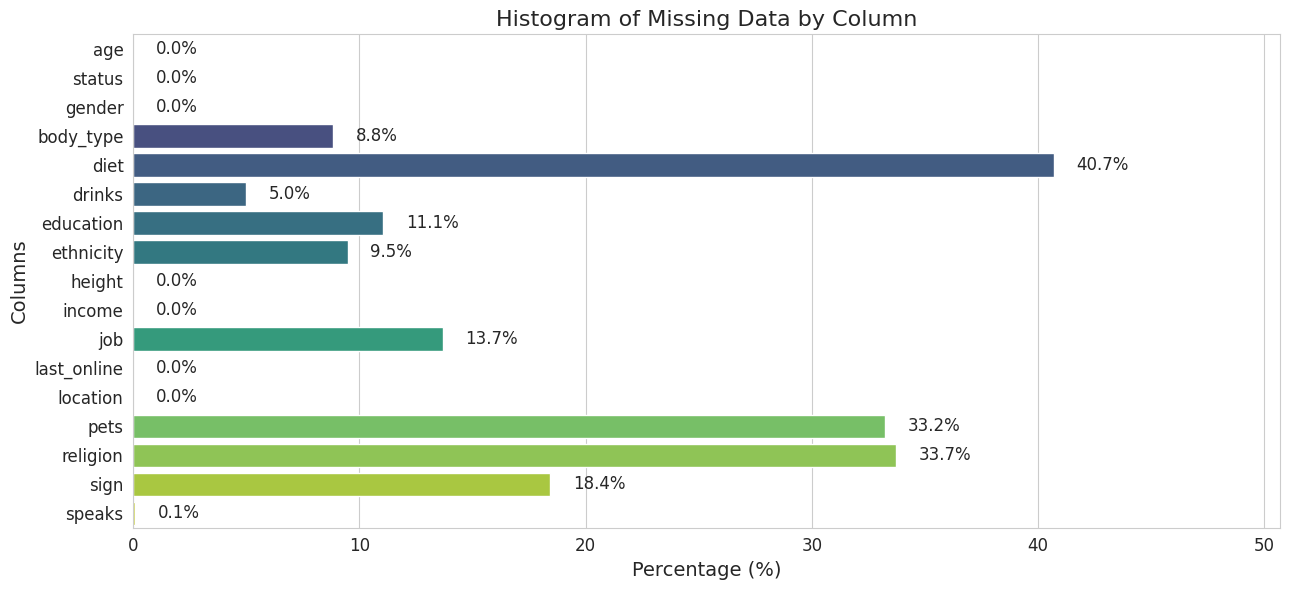

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(13, 6))
palette = sns.color_palette("viridis", len(missing_percentage))

ax = sns.barplot(
    y=missing_percentage.index, x=missing_percentage.values,
    hue=missing_percentage.index, palette=palette, orient='h', legend=False
)

for i, v in enumerate(missing_percentage.values):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=12)

plt.title("Histogram of Missing Data by Column", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Columns", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, max(missing_percentage.values) + 10)
plt.tight_layout()
plt.show()

##**3.8 Unique Value Count Of Columns**

In [ ]:
# Counting unique values in each column and presenting them in a DataFrame
unique_values_df = pd.DataFrame({
    "Column Name": data.columns,
    "Unique Value Count": [data[col].nunique() for col in data.columns]
})

# Display the DataFrame
print("Unique Value Counts:\n", unique_values_df)

Unique Value Counts:
     Column Name  Unique Value Count
0           age                  54
1        status                   5
2        gender                   2
3     body_type                  12
4          diet                  18
5        drinks                   6
6     education                  32
7     ethnicity                 217
8        height                  60
9        income                  13
10          job                  21
11  last_online               30123
12     location                 199
13         pets                  15
14     religion                  45
15         sign                  48
16       speaks                7647


##**3.9 Statistical Summary [age, height, & income]**

In [ ]:
# Checking summary statistics for specific numerical columns

print(data.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


#**4. DATA PREPARATION**

##**4.1 df: Backup of the Dataset**

**Creating a copy of the original dataset is a good practice because it:**

**Prevents Data Loss:** If cleaning goes wrong, the original data remains untouched for reference or rollback.

**Enables Experimentation:** We can try different cleaning methods on the copy without risking the original data.

**Maintains Integrity:** Keeps a record of the raw data for comparison or future use.

In [ ]:
df = data.copy()

# Confirmation by printing the first few rows of the copied dataset
print("Copy of the dataset has been created with the name 'df'")

Copy of the dataset has been created with the name 'df'


##**4.3 Duplicate Rows Handing**

Removing duplicate rows ensures the dataset is clean, avoids redundancy, and prevents repeated data from skewing the analysis

###Checking duplicate Rows

In [ ]:
# Checking for duplicate rows
total_rows = df.shape[0]
num_duplicates = df.duplicated().sum()

# Printing the results
print(f"Total number of rows: {total_rows}")
print(f"Number of duplicate rows: {num_duplicates}")

Total number of rows: 59946
Number of duplicate rows: 0


###Removing Duplicate Rows If Present

In [ ]:
# Removing duplicate rows
df = df.drop_duplicates()

# Confirmation
print(f"Duplicate rows removed: {num_duplicates}")
print(f"Remaining rows in the dataset: {df.shape[0]}")

Duplicate rows removed: 0
Remaining rows in the dataset: 59946


##**4.2 Structuring the Dataset**

### 4.2.1 Lowercasing Dataset

##**4.3 Fixing Incorrect Data Types**

### Converting 'last_online' to datetime format

In [ ]:
# Converting 'last_online' to datetime format
df['last_online'] = pd.to_datetime(df['last_online'], errors='coerce', format='%Y-%m-%d-%H-%M')


### Replacing invalid income values (e.g., -1) with 0 and converts the column to integers.

In [ ]:
# Ensure income is numeric (replace -1 values with 0)
df['income'] = df['income'].replace(-1, 0).astype(int)

###Converting height from inches to centimeters (1 inch = 2.54 cm) and drops the redundant original column.

In [ ]:
# Convert height to centimeters (1 inch = 2.54 cm)
df['height_cm'] = df['height'] * 2.54

# Droping the old 'height' column to avoid redundancy
df = df.drop(columns=['height'])

##**4.4 Missing Value Imputation**

###4.4.1 Replaces missing height values using the median height for each gender.

In [ ]:
# Fill missing values in 'height' column with the median height grouped by 'gender'
df['height_cm'] = df['height_cm'].fillna(df.groupby('gender')['height_cm'].transform('median'))

###4.4.2 Filling missing values in categorical columns with “unknown” to maintain completeness

In [ ]:
# Replace missing values with 'unknown' in the specified columns
columns_to_replace = ['diet', 'religion', 'pets', 'sign', 'job', 'education', 'ethnicity', 'body_type', 'drinks', 'speaks']
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')

##**4.5 Outliers Removal**

Outliers are first visualized using boxplots and then removed using the Interquartile Range (IQR) method, ensuring that extreme values do not distort the analysis.

####🔻 Boxtplot Of [ age & height ] Before Outliers Removal

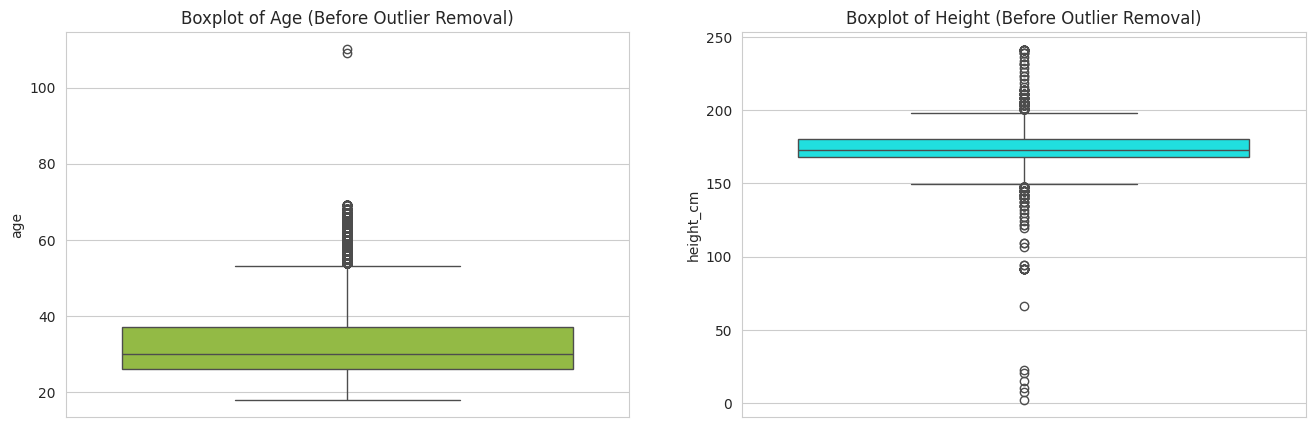

In [ ]:
# Set figure size
plt.figure(figsize=(16, 5))

# Age Outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'], color='yellowgreen')
plt.title("Boxplot of Age (Before Outlier Removal)")

# Height Outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['height_cm'], color='aqua')
plt.title("Boxplot of Height (Before Outlier Removal)")

# Show plots
plt.show()

####🔻 Using Interquartile Range (IQR) To Remove Outliers

In [ ]:
#  Removing Outliers Using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR method to remove outliers
df = remove_outliers(df, 'age')
df = remove_outliers(df, 'height_cm')

####🔻 Boxtplot Of [ age & height ] After Outliers Removal

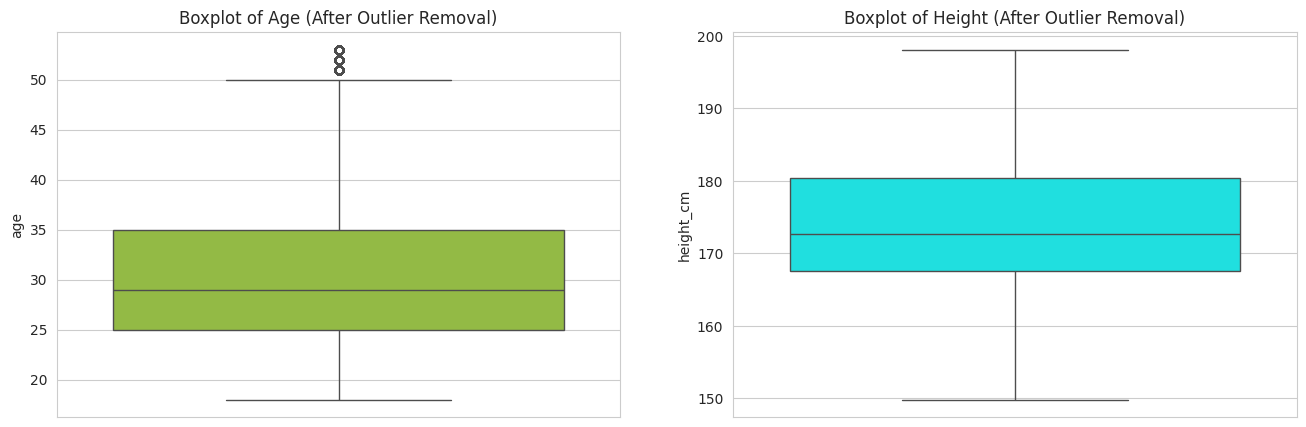

In [ ]:
# Visualizing Outliers After Removal
plt.figure(figsize=(16, 5))

# Age Outliers After Removal
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'], color='yellowgreen')
plt.title("Boxplot of Age (After Outlier Removal)")

# Height Outliers After Removal
plt.subplot(1, 2, 2)
sns.boxplot(y=df['height_cm'], color='aqua')
plt.title("Boxplot of Height (After Outlier Removal)")

# Show plots
plt.show()

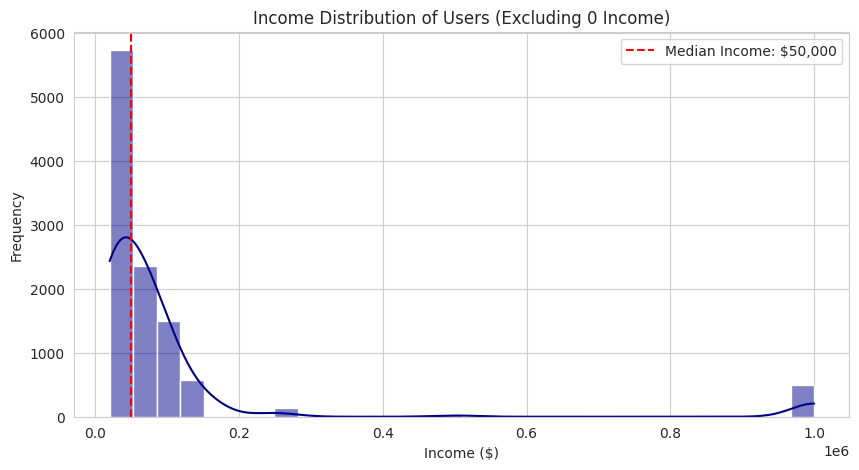

In [ ]:
# Income Distribution (Excluding 0 income)
plt.figure(figsize=(10, 5))
sns.histplot(df[df["income"] > 0]["income"], bins=30, kde=True, color="darkblue")
plt.axvline(df[df["income"] > 0]["income"].median(), color='red', linestyle='dashed', label=f'Median Income: ${df[df["income"] > 0]["income"].median():,.0f}')
plt.title("Income Distribution of Users (Excluding 0 Income)")
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Remove income greater than 200000
df = df[df["income"] <= 200000]

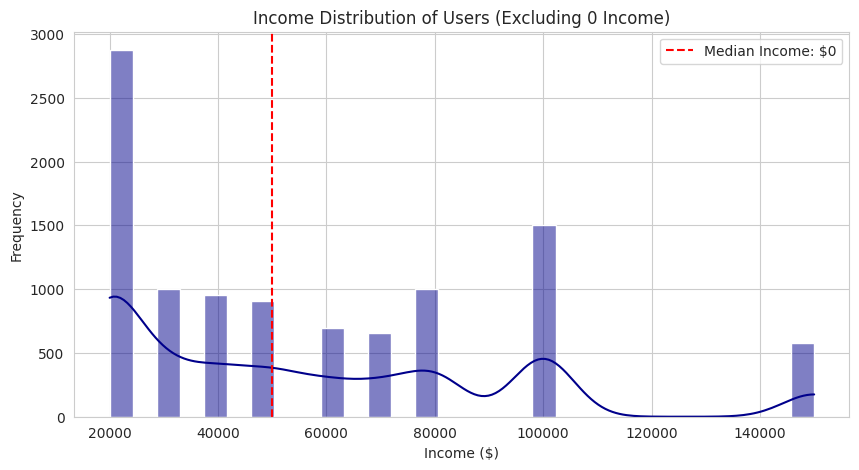

In [ ]:
# Income Distribution (Excluding 0 income)
plt.figure(figsize=(10, 5))
sns.histplot(df[df["income"] > 0]["income"], bins=30, kde=True, color="darkblue")
plt.axvline(df[df["income"] > 0]["income"].median(), color='red', linestyle='dashed', label=f'Median Income: ${df[df["income"] >= 0]["income"].median():,.0f}')
plt.title("Income Distribution of Users (Excluding 0 Income)")
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

##**4.6 Featuring Engineering**

###4.6.1 ***city*** & ***state*** **:** Extracted these details in two columns from the location string.

In [ ]:
# Extract city and state from location
df['location'] = df['location'].fillna('Unknown, Unknown')
df[['city', 'state']] = df['location'].str.split(', ', expand=True, n=1)

# Print the 'location','city' and 'state' columns
print(df[['location', 'city', 'state']].sample(10))

                        location           city       state
52244  san francisco, california  san francisco  california
42642        oakland, california        oakland  california
58189     burlingame, california     burlingame  california
58454  san francisco, california  san francisco  california
24090        oakland, california        oakland  california
43518  san francisco, california  san francisco  california
57068  san francisco, california  san francisco  california
53676     san rafael, california     san rafael  california
52538  san francisco, california  san francisco  california
44620     emeryville, california     emeryville  california


###4.6.2 ***zodiac*** & ***zodiac_imp*** **:** Processes the ‘sign’ column to extract the zodiac sign and belief.

In [ ]:
# Define the keywords to look for
keywords = ['fun', 'does', 'matter', 'unknown']

# Function to extract keywords from a sentence
def extract_keywords(sentence):
    if pd.isna(sentence):  # Check if the value is NaN
        return 'not specified'
    found_keywords = [word for word in keywords if word in str(sentence)]
    if not found_keywords:
        return 'not specified'
    elif 'does' in found_keywords:
        return "doesn't matter"
    else:
        return ', '.join(found_keywords)

# Apply the function to create the new column 'zodiac_imp'
df['zodiac_imp'] = df['sign'].apply(extract_keywords)

# Replace 'does' with 'doesn't' in the 'sign' column
df['sign'] = df['sign'].str.replace('\bdoes\b', "doesn't", regex=True)


# Extract only the zodiac sign name (removing extra text like "but it doesn’t matter")
df['zodiac'] = df['sign'].str.extract(r'(\b\w+\b)')  # Extract only the first word

# Print the 'sign' and 'zodiac_imp' columns
print(df[['sign', 'zodiac_imp', 'zodiac']].sample(10))

                                           sign      zodiac_imp     zodiac
14245                                   unknown         unknown    unknown
26149        taurus but it doesn&rsquo;t matter  doesn't matter     taurus
11492                                   scorpio   not specified    scorpio
30793                                   unknown         unknown    unknown
54175  gemini and it&rsquo;s fun to think about             fun     gemini
32235         virgo but it doesn&rsquo;t matter  doesn't matter      virgo
59605     capricorn but it doesn&rsquo;t matter  doesn't matter  capricorn
9113         cancer but it doesn&rsquo;t matter  doesn't matter     cancer
41275                                   unknown         unknown    unknown
23087   aries and it&rsquo;s fun to think about             fun      aries


###4.6.3 ***income_cat*** **:** Categorizes income into defined groups (e.g., very low, low, medium, high).

In [ ]:
# Function to categorize income
def categorize_income(income):
    if pd.isna(income):
        return 'unknown'
    elif 0 <= income <= 30000:
        return 'very low'
    elif 31000 <= income <= 60000:
        return 'low'
    elif 61000 <= income <= 120000:
        return 'medium'
    elif income > 120000:
        return 'high'
    else:
        return 'unknown'

# Apply the function to create the new column 'income_cat'
df['income_group'] = df['income'].apply(categorize_income)

# Print the 'income' and 'income_cat' columns
print(df[['income', 'income_group']].sample(10))

       income income_group
10904       0     very low
45987       0     very low
33203  100000       medium
45829       0     very low
54604       0     very low
2813        0     very low
39325       0     very low
26493   40000          low
45145   80000       medium
8750        0     very low


###4.6.4 ***primary_language*** **:** Derives the primary language from the ‘speaks’ column.

In [ ]:
# Clean and Structure Language Data

# Extract primary language (assuming first language listed)
df['primary_language'] = df['speaks'].str.split(',').str[0]

# Standardize language names (remove additional text like "fluently", "poorly")
df['primary_language'] = df['primary_language'].str.extract(r'(\b\w+\b)').fillna("Unknown")

# Print the 'speaks', and 'primary' columns
print(df[['speaks', 'primary_language']].sample(10))

                                                  speaks primary_language
2337                  english (fluently), spanish (okay)          english
44154          english, spanish (okay), swedish (poorly)          english
53367                                            english          english
46763                                            english          english
28337                                            english          english
37485                                            english          english
18941                                   english (poorly)          english
2527   english (fluently), farsi (poorly), spanish (p...          english
18736                                            english          english
36500                                            english          english


###4.6.5 ***last_active*** **:**  Calculates how long ago a user was active compared to most active **user**

In [ ]:
# Get the min and max 'last_online' values
min_last_online = df['last_online'].min()
max_last_online = df['last_online'].max()

# Calculate the difference in days between min and max
date_difference = (max_last_online - min_last_online).days

# Calculate 'last_active' as the difference from the max 'last_online'
df['last_active'] = max_last_online - df['last_online']

# Convert 'last_active' to a readable format (days and hours ago)
df['last_active'] = df['last_active'].apply(lambda x: f"{x.days} days, {x.seconds // 3600} hours ago")

# Print min and max 'last_online' values
print(f"\nEarliest (min) last_online: {min_last_online}")
print(f"Latest (max) last_online used as current time: {max_last_online}\n")
print(f"Difference between min and max last_online: {date_difference} days\n")

# Print the 'speaks', and 'primary' columns
print(df[['last_online','last_active']].sample(10))



Earliest (min) last_online: 2011-06-27 01:52:00
Latest (max) last_online used as current time: 2012-07-01 08:57:00

Difference between min and max last_online: 370 days

              last_online             last_active
56046 2012-06-30 23:24:00     0 days, 9 hours ago
55202 2012-06-27 21:57:00    3 days, 11 hours ago
3974  2012-06-29 02:21:00     2 days, 6 hours ago
52867 2012-04-22 06:08:00    70 days, 2 hours ago
11900 2011-09-12 20:15:00  292 days, 12 hours ago
45209 2012-06-30 23:32:00     0 days, 9 hours ago
14091 2011-07-27 19:30:00  339 days, 13 hours ago
2691  2012-03-19 14:59:00  103 days, 17 hours ago
30239 2012-01-19 23:28:00   163 days, 9 hours ago
43076 2012-06-28 13:20:00    2 days, 19 hours ago


In [ ]:
# Binning last active days
def categorize_activity(days):
    if days <= 10:
        return "Most Active"
    elif days <= 30:
        return "Active"
    elif days <= 90:
        return "Less Active"
    else:
        return "Not Active"

df["last_active_days"] = df["last_active"].str.extract(r'(\d+)').astype(float)
df["activity_status"] = df["last_active_days"].apply(categorize_activity)


###4.6.6 ***age_bin*** **:** Bins the age data into specified groups to support age-based analysis

In [ ]:
# Define bin edges:

# [18, 25)  -> Ages 18-24
# [25, 31)  -> Ages 25-30
# [31, 36)  -> Ages 31-35
# [36, 41)  -> Ages 36-40
# [41, 51)  -> Ages 41-50
# [51, ∞)   -> Ages 51 and above (labeled as "50+")

bins = [18, 25, 31, 36, 41, 51, np.inf]

# Define the labels corresponding to each bin
labels = ["18-24", "25-30", "31-35", "36-40", "41-50", "50+"]

# Create a new column 'age_bin' by binning the 'age' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Now print the 'age' and 'age_bin' columns
print(df[['age', 'age_group']].sample(10))

       age age_group
6396    28     25-30
26142   37     36-40
58161   44     41-50
45042   26     25-30
12617   27     25-30
25271   28     25-30
9525    28     25-30
13822   37     36-40
12256   25     25-30
29971   34     31-35


###4.6.7 ***combined_ethnicity*** **:** Processes the 'ethnicity' column to extract the primary ethnicity and color

In [ ]:
def extract_combined_ethnicity(text):
    if not text or text.strip() == "":
        return "unknown"
    lower_text = text.lower()
    # Extract the primary word (before a comma or slash)
    primary = lower_text.split(',')[0].split('/')[0].strip()
    # If primary is "black" or "white", return it directly.
    if primary in ['black', 'white']:
        return primary
    # Otherwise, check for "black" or "white" anywhere in the text.
    if "black" in lower_text:
        return f"{primary}, black"
    elif "white" in lower_text:
        return f"{primary}, white"
    else:
        return primary

# Create the combined_ethnicity column
df['combined_ethnicity'] = df['ethnicity'].apply(extract_combined_ethnicity)

# Display a sample of 10 rows
print(df[['ethnicity', 'combined_ethnicity']].sample(10))

                     ethnicity combined_ethnicity
50778                    white              white
16845                    other              other
38610                    asian              asian
36560  hispanic / latin, white    hispanic, white
50469                    white              white
30023                    white              white
48348                    white              white
37007         pacific islander   pacific islander
39512                    white              white
31175                    white              white


##**4.7 Eliminating Unnecessary Columns**

#ANALYSIS

<ipython-input-33-f2a4cad83ef6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)


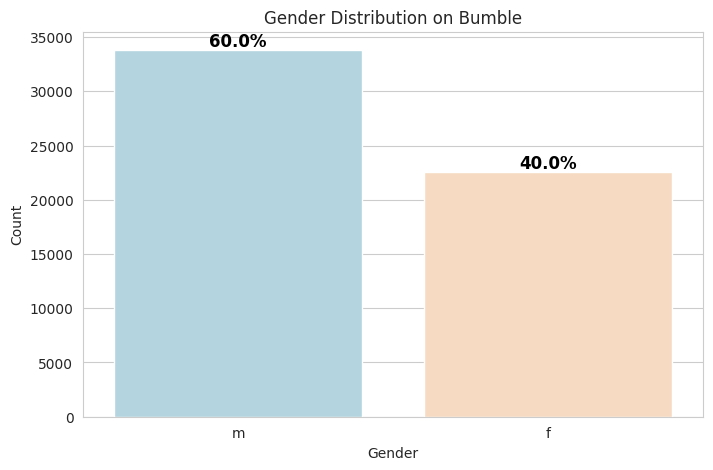

In [ ]:
# Get gender distribution count
gender_counts = df["gender"].value_counts()
total = gender_counts.sum()

# Define colors similar to the uploaded chart
colors = ["lightblue", "peachpuff"]

# Create bar plot for gender distribution
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)

# Add title and labels
plt.title("Gender Distribution on Bumble")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add percentage on top of bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

plt.show()

###Importance of Zodiac Sign in Matchmaking

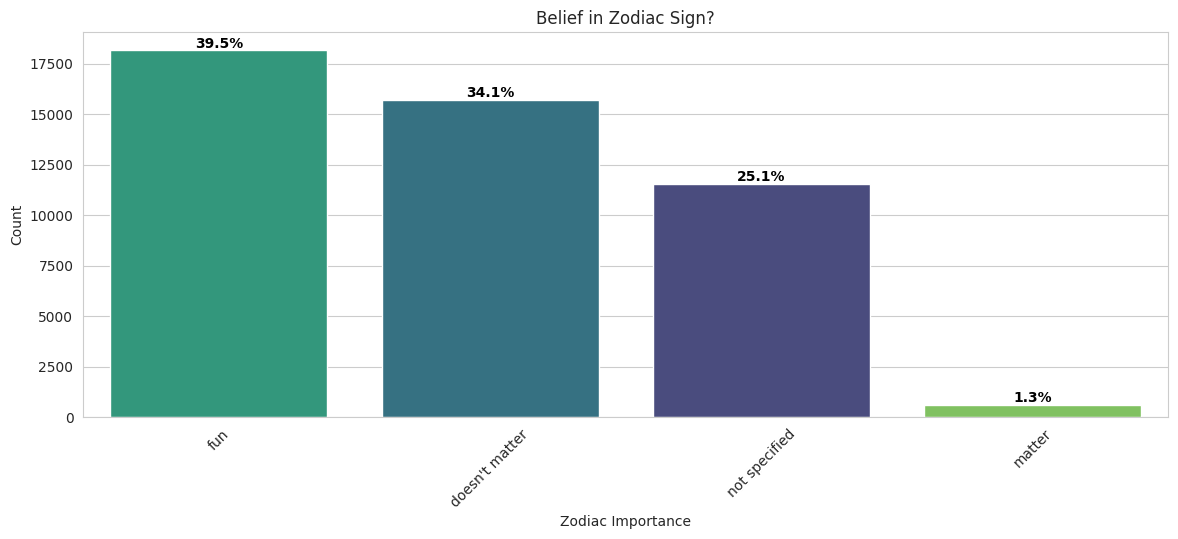

In [ ]:
# Filter only for plotting by excluding unknown
df_filtered = df[df["zodiac_imp"] != "unknown"]

plt.figure(figsize=(14, 5))
ax = sns.countplot(data=df_filtered, x="zodiac_imp",
                   order=df_filtered["zodiac_imp"].value_counts().index,
                   hue="zodiac_imp", palette="viridis", legend=False)  # Fixes FutureWarning

plt.title("Belief in Zodiac Sign?")
plt.xlabel("Zodiac Importance")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add percentage labels on top of bars
total = len(df_filtered)
for p in ax.patches:
    ax.annotate(f'{100 * p.get_height() / total:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

Importance of Zodiac Sign in Matchmaking
Insights:

- The majority (32.2%) consider zodiac signs as "fun," implying a casual interest.
- 27.8% of users state it "doesn’t matter," showing a significant portion is indifferent.
- 20.5% have not specified their stance, indicating a lack of preference or importance.
- A very small percentage (1.1%) believe zodiac signs "matter" in matchmaking.



Recommendations:

- If Bumble wants to cater to zodiac enthusiasts, it can introduce optional astrology-based compatibility features.
- Highlighting zodiac-based personality traits in user bios could engage the segment that finds it "fun."

###Distribution of Combined Ethnicity


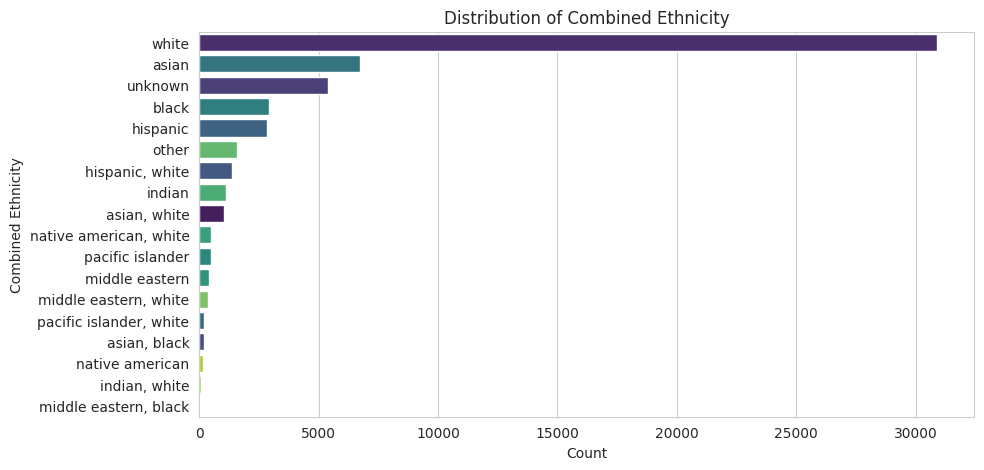

In [ ]:
# Combined Ethnicity Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="combined_ethnicity", order=df["combined_ethnicity"].value_counts().index, hue="combined_ethnicity", legend=False, palette="viridis")
plt.title("Distribution of Combined Ethnicity")
plt.xlabel("Count")
plt.ylabel("Combined Ethnicity")
plt.show()

**Insights:**

- White users form the largest demographic, followed by Asian and Unknown categories.
- The "Unknown" category is relatively large, which may indicate missing or undisclosed information.
- Ethnic diversity is present, with Black, Hispanic, and Indian users forming a smaller but noticeable segment.
- Multi-ethnic identities (e.g., "Asian, White" and "Hispanic, White") indicate users embracing mixed backgrounds.


**Recommendations:**

* Encourage users to specify their ethnicity to gain better insights and improve personalized experiences.
* Consider introducing culturally inclusive features, such as ethnicity-based filters or matchmaking events to enhance diversity

###User Activity Trend - Last Online Day of the Week

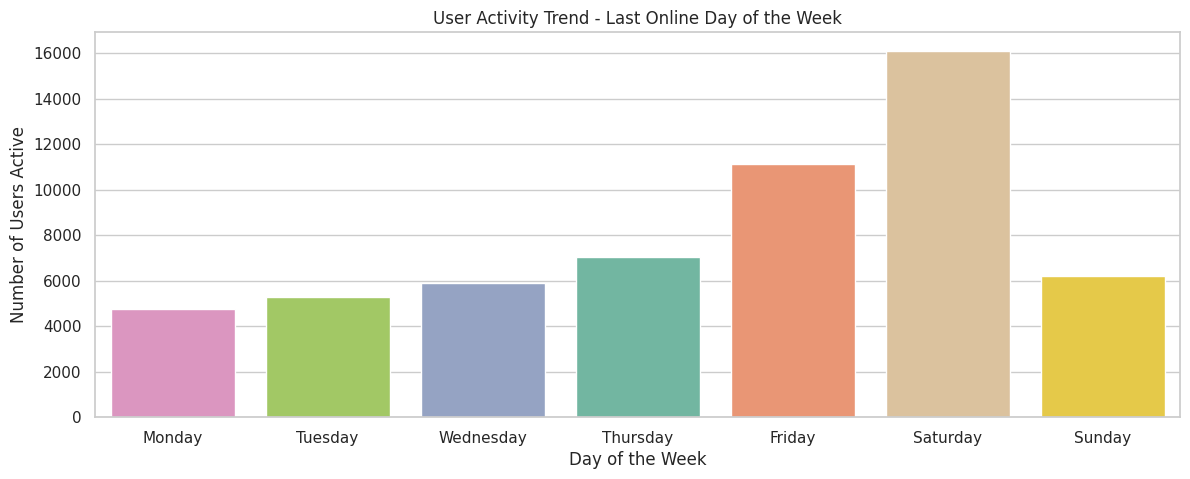

In [ ]:
# Set style for plots
sns.set(style="whitegrid")

# Convert 'last_online' to datetime format
df["last_online"] = pd.to_datetime(df["last_online"], errors='coerce')

# Extract day of the week for activity analysis
df["last_online_day"] = df["last_online"].dt.day_name()

# User Activity Trends (Last Online by Day of the Week)
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x="last_online_day", hue="last_online_day", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], legend=False, palette="Set2")
plt.title("User Activity Trend - Last Online Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Users Active")
plt.show()

**Insights:**

- Saturday is the most active day, followed by Friday, indicating that weekend engagement is highest.
- Monday to Thursday have lower engagement, suggesting users are busy with work/school.
- Sunday sees a dip compared to Saturday, possibly as users prepare for the upcoming week.
- Weekends see a significant jump in user activity, making them prime times for engagement.

**Recommendations:**

* Push notifications or promotions should be scheduled for Friday and Saturday to maximize engagement.
* Consider launching special Bumble events or features on weekends to capitalize on peak activity.

###Users Age Distribution of Users

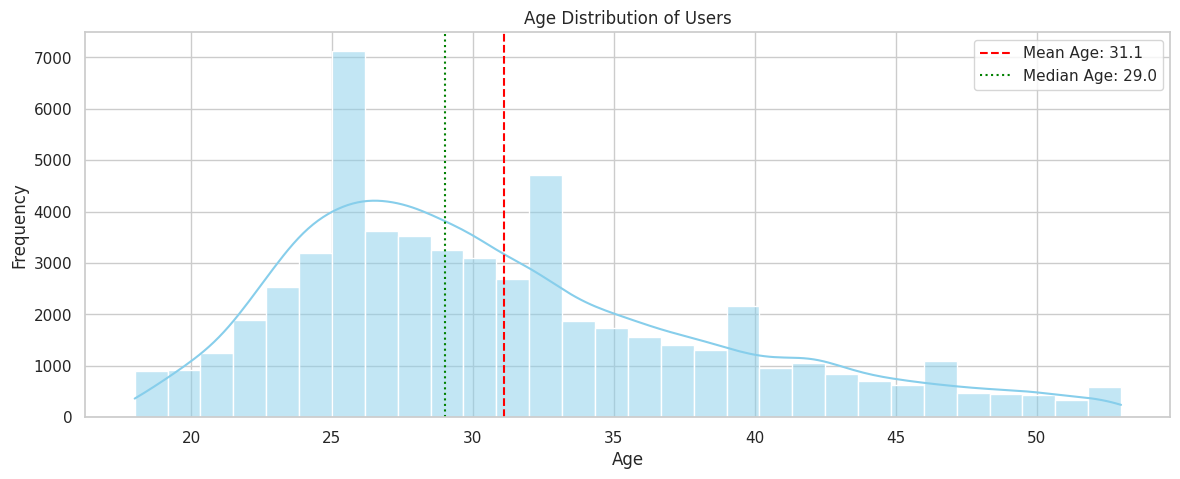

In [ ]:
# Age Distribution
plt.figure(figsize=(14, 5))
sns.histplot(df["age"], bins=30, kde=True, color="skyblue")

# Mean line
plt.axvline(df["age"].mean(), color='red', linestyle='dashed', label=f'Mean Age: {df["age"].mean():.1f}')

# Median line
plt.axvline(df["age"].median(), color='green', linestyle='dotted', label=f'Median Age: {df["age"].median():.1f}')

plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**observation**

- The majority of users fall between 25-35 years old, indicating a prime demographic for dating.
- There is a sharp peak around 25-26 years, suggesting a highly engaged younger audience.
- The mean age is around 31, but the distribution is skewed slightly towards younger users.
- Few users are above 45, meaning Bumble is less popular among older demographics.


**Recommendations:**

- Targeted marketing campaigns should focus on millennials and Gen Z, as they make up most of the user base.
- Consider features that appeal to different age groups, such as professional networking options for older users.

<ipython-input-41-b302be8b6523>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['age_group'], y=df['income'], palette="muted")


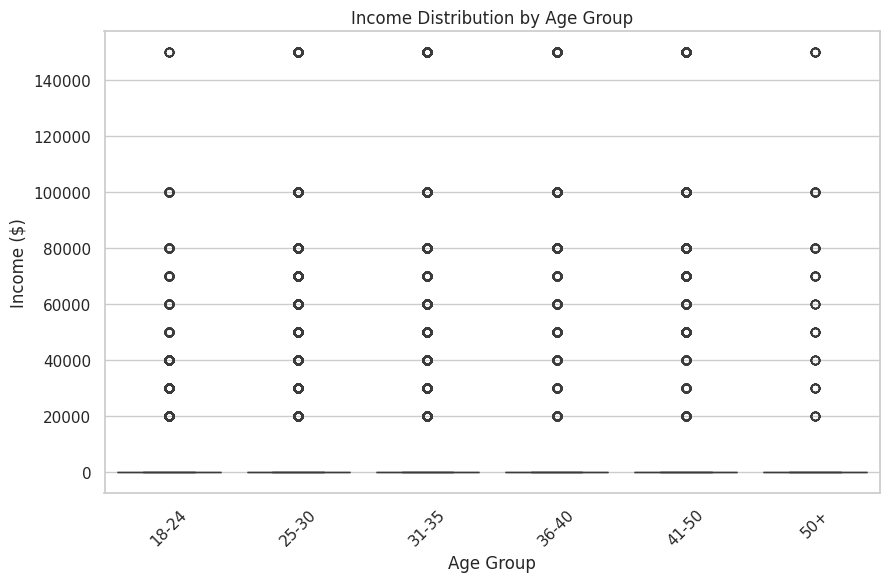

In [ ]:
# Boxplot for income by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age_group'], y=df['income'], palette="muted")
plt.title("Income Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Income ($)")
plt.xticks(rotation=45)
plt.show()

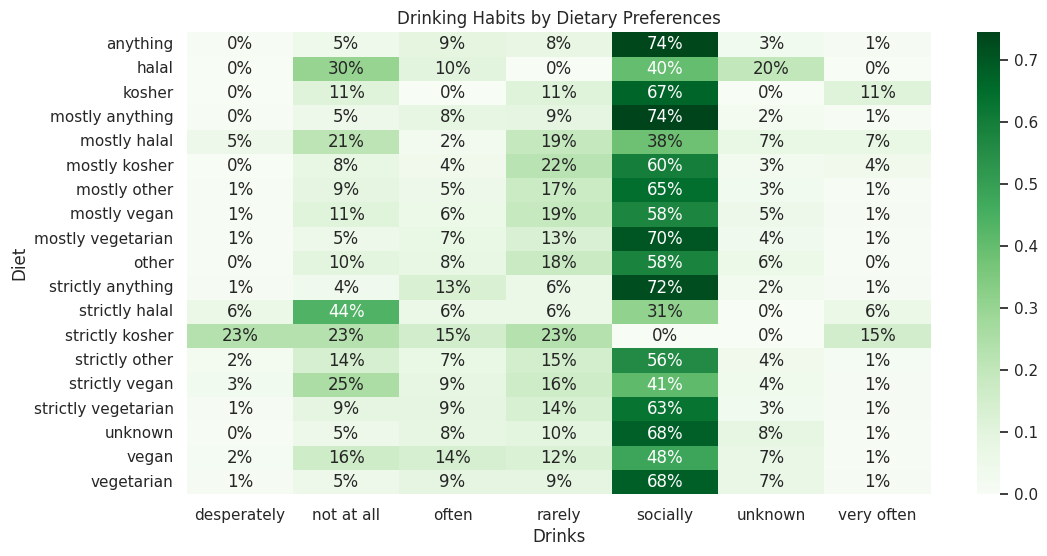

In [ ]:


# Drinks by diet heatmap
plt.figure(figsize=(12,6))
sns.heatmap(drinks_by_diet, annot=True, fmt='.0%', cmap='Greens')
plt.title('Drinking Habits by Dietary Preferences')
plt.xlabel('Drinks')
plt.ylabel('Diet')
plt.show()

